In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from pickle import dump
import pickle

In [2]:
# Your code here

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

In [3]:
df = pd.read_csv(url)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df_original = df.copy()

In [6]:
df = df[['Latitude', 'Longitude', 'MedInc']]
df

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [7]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   16512 non-null  float64
 1   Longitude  16512 non-null  float64
 2   MedInc     16512 non-null  float64
dtypes: float64(3)
memory usage: 516.0 KB


Modelo No supervisado

In [9]:
km = KMeans(n_clusters=6,
            init="random",
            n_init='auto',
            max_iter=300,
            random_state=42)
y_km = km.fit(X_train)

 

In [10]:
y_train = list(km.labels_)
X_train['cluster'] = y_train
X_train

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,2
8267,33.77,-118.16,3.8125,2
17445,34.66,-120.48,4.1563,3
14265,32.69,-117.11,1.9425,2
2271,36.78,-119.80,3.5542,3
...,...,...,...,...
11284,33.78,-117.96,6.3700,1
11964,34.02,-117.43,3.0500,2
5390,34.03,-118.38,2.9344,2
860,37.58,-121.96,5.7192,4


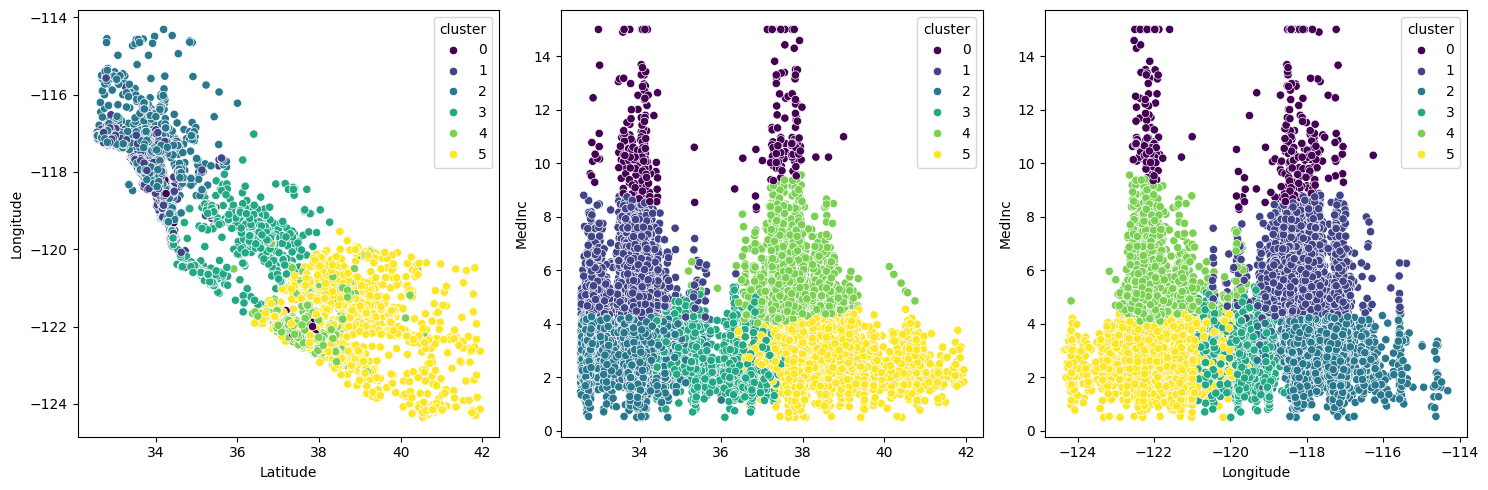

In [11]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(ax=axis[0], x='Latitude', y='Longitude', data=X_train, hue='cluster', palette='viridis')
sns.scatterplot(ax=axis[1], x='Latitude', y='MedInc', data=X_train, hue='cluster', palette='viridis')
sns.scatterplot(ax=axis[2], x='Longitude', y='MedInc', data=X_train, hue='cluster', palette='viridis')
plt.tight_layout()

plt.show()

Prediccion con X_test

In [12]:
y_test = list(km.predict(X_test))
X_test['cluster'] = y_test 
X_test.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,1
9814,36.62,-121.93,3.7250,5


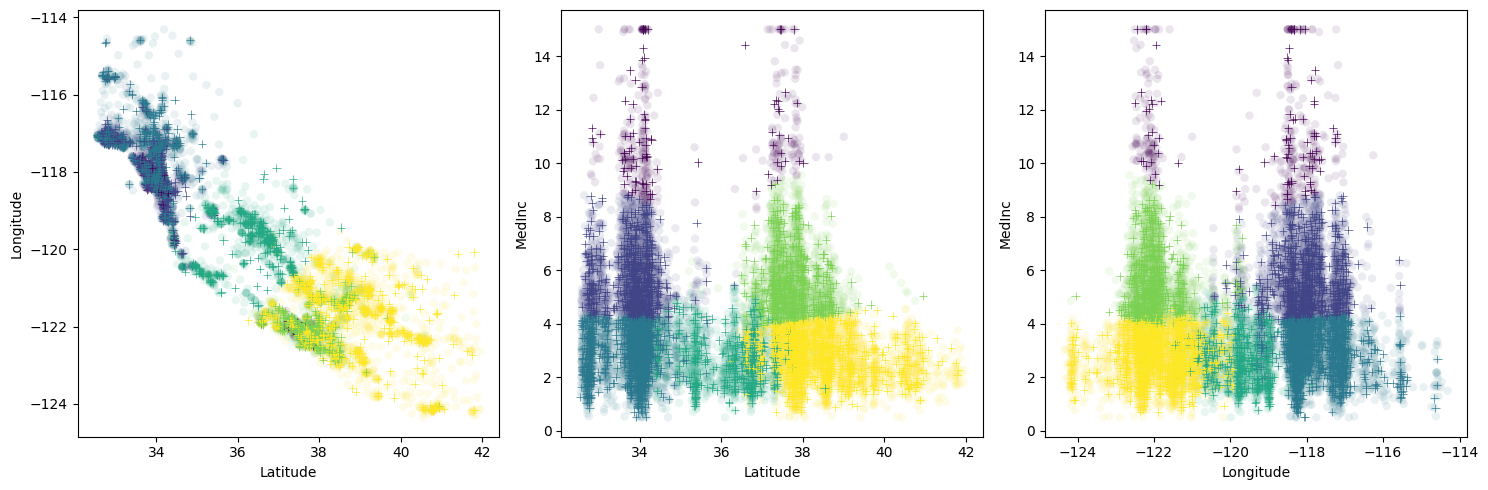

In [13]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(ax=axis[0], x='Latitude', y='Longitude', data=X_train, hue='cluster', palette='viridis', alpha = 0.1)
sns.scatterplot(ax=axis[1], x='Latitude', y='MedInc', data=X_train, hue='cluster', palette='viridis', alpha = 0.1)
sns.scatterplot(ax=axis[2], x='Longitude', y='MedInc', data=X_train, hue='cluster', palette='viridis', alpha = 0.1)

sns.scatterplot(ax=axis[0], x='Latitude', y='Longitude', data=X_test, hue='cluster', palette='viridis', marker = '+')
sns.scatterplot(ax=axis[1], x='Latitude', y='MedInc', data=X_test, hue='cluster', palette='viridis', marker = '+')
sns.scatterplot(ax=axis[2], x='Longitude', y='MedInc', data=X_test, hue='cluster', palette='viridis', marker = '+')

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

**Entrando al Modelo Supervisado**

In [14]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

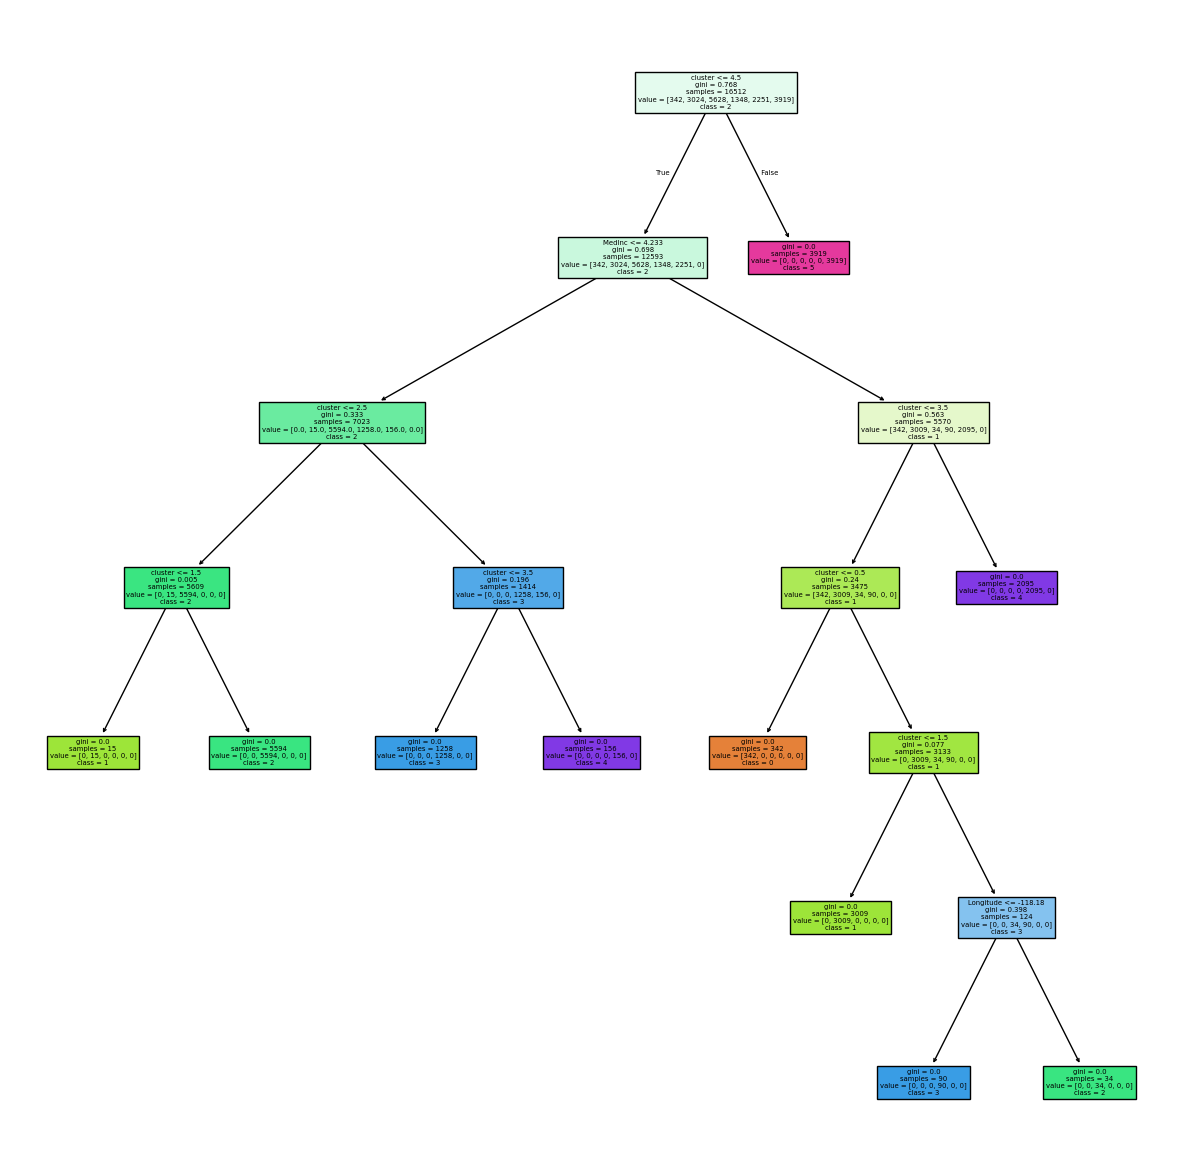

In [15]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['0', '1', '2', '3', '4', '5'])

plt.show()

In [16]:
y_pred = model.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 3, 2], dtype=int32)

In [17]:
accuracy_score(y_test, y_pred)

1.0

In [18]:
dump(y_km, open('/workspaces/Develop Linux/PROJECTS - 4GEEKS/Aprendizaje No Supervisado/Aprendizaje-no-supervisado/models/Mod_no_sup.sav', 'wb'))
dump(model, open('/workspaces/Develop Linux/PROJECTS - 4GEEKS/Aprendizaje No Supervisado/Aprendizaje-no-supervisado/models/Mod_sup.sav', 'wb'))
